Системы аналитических вычислений.

Лабораторная работа №1.

<h1>Часть 1 - Квадратик</h1>

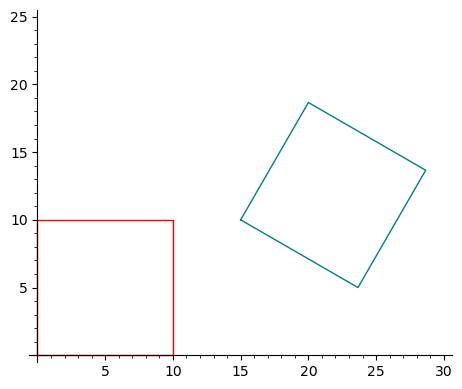

In [1]:
var("a b")
a = 10
b = 15

rect = matrix([[0, 0], 
               [0, a], 
               [a, a], 
               [a, 0], 
               [0, 0]])

alpha = math.radians(30)

rot_mat = matrix([[cos(alpha), -sin(alpha)], 
                  [sin(alpha), cos(alpha)]])

mat = matrix([[b, a], 
              [b, a], 
              [b, a], 
              [b, a], 
              [b, a]])

new_rect = rect * rot_mat + mat

show(line(new_rect, rgbcolor=(0, 0.5, 0.5))+
     line(rect, color = 'red'), 
     aspect_ratio = 1, ymin = 0, ymax = 25, xmax = 30, xmin = 0)

<h1>Часть 2 - Исследование функции </h1>

Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>

Вариант: 2

In [2]:
y(x) = sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x)
show(y)

x |--> 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

Построим график этой функции

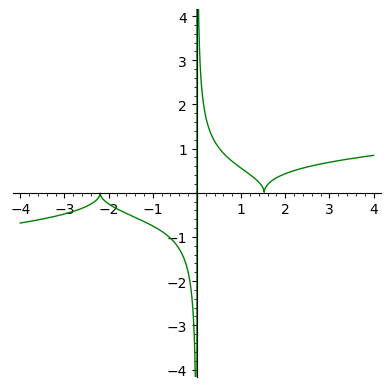

In [3]:
plot(y, xmin = -4, xmax = 4, ymin = -4, ymax = 4, color = 'green', aspect_ratio=1)

1. Область определения функции

Так как в знаменателе функции стоит x, у нас появляется ограничение x$\neq$0

In [5]:
var('s')
s = solve(x!=0, x, algorithm='sympy')
s

[[x < 0], [x > 0]]

2. Является ли функция четной или нечетной, является ли периодической.

Четность функции

In [6]:
(y(x) - y(-x)).expand().simplify()

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x + 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

Равенство y(x) = y(-x) не выполняется, значит функция не является четной

Нечетность функции

In [7]:
(y(x) + y(-x)).expand().simplify()

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x - 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

Равенство y(x) = -y(-x) не выполняется, значит функция не является нечетной

Проверка периодичности

In [9]:
var('x T')
eq1 = y(x) - y(x + T)
eq1.simplify_full()

-1/4*(x*sqrt(abs(3*T^3 + (9*T + 2)*x^2 + 3*x^3 + 2*T^2 + (9*T^2 + 4*T - 10)*x - 10*T)) - (T + x)*sqrt(abs(3*x^3 + 2*x^2 - 10*x)))/(T*x + x^2)

In [10]:
eq1 = _
show(eq1)

-1/4*(x*sqrt(abs(3*T^3 + (9*T + 2)*x^2 + 3*x^3 + 2*T^2 + (9*T^2 + 4*T - 10)*x - 10*T)) - (T + x)*sqrt(abs(3*x^3 + 2*x^2 - 10*x)))/(T*x + x^2)

In [11]:
eq1(x=1, T=1)

1/4*sqrt(5) - 1/4*sqrt(3)

In [12]:
eq1 = y(x) - y(x + T)
show(solve(eq1, T))

[T == x*(sqrt(abs(3*T^3 + (9*T + 2)*x^2 + 3*x^3 + 2*T^2 + (9*T^2 + 4*T - 10)*x - 10*T)) - sqrt(abs(3*x^3 + 2*x^2 - 10*x)))/sqrt(abs(3*x^3 + 2*x^2 - 10*x))]

Функция является является функцией общего вида, не периодической

3. Точки пересечения графика с осями координат

Так как ОДЗ сказано, что x$\neq$0, то график будет пересекать лишь ось абсцисс

In [13]:
show(solve(y,x))

[x == -1/3*sqrt(31) - 1/3, x == 1/3*sqrt(31) - 1/3, x == 0]

x = 0 откидываем из-за ОДЗ, остается лишь две точки пересечения: -1/3+sqrt(31)/3 и -1/3-sqrt(31)/3

4. Промежутки знакопостоянства

In [15]:
solve(y(x)<0, x)

[[x < 0, sqrt(abs(3*x^2 + 2*x - 10)*abs(x)) > 0]]

In [16]:
solve(y(x)>=0, x)

[[-3*x^2 - 2*x + 10 > 0, 3*x^2 + 2*x - 10 == 0, x != 0],
 [3*x^2 + 2*x - 10 == 0, 3*x^2 + 2*x - 10 == 0, x != 0],
 [3*x^2 + 2*x - 10 > 0, 3*x^2 + 2*x - 10 == 0, x != 0],
 [x == 0, 0 != 0],
 [0 < x, sqrt(abs(3*x^2 + 2*x - 10)*abs(x)) > 0]]

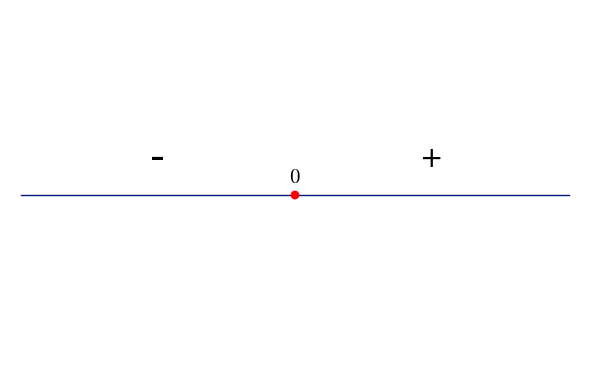

In [17]:
intervals = plot(0, xmin = -2, xmax = 2, ymin = -1, ymax = 1, rgbcolor=(0, 0.1, 0.5))
intervals += point((0, 0), color = "red", size = 40,  zorder = 15)

intervals += text("$0$", (0, 0.1), color = "black", fontsize = 15)
intervals += text("-", (-1, 0.2), color = "black", fontsize = 30) 
intervals += text("+", (1, 0.2), color = "black", fontsize = 20)

intervals.show(axes=False)

5. Промежутки возрастания и убывания

Найдем производную и её интервалы знакопостоянства.

In [18]:
der = y.derivative()
der.show()

x |--> 1/16*((3*conjugate(x)^3 + 2*conjugate(x)^2 - 10*conjugate(x))*(9*x^2 + 4*x - 10) + (3*x^3 + 2*x^2 - 10*x)*(9*conjugate(x)^2 + 4*conjugate(x) - 10))/(x*abs(3*x^3 + 2*x^2 - 10*x)^(3/2)) - 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x^2

In [19]:
solve(der > 0, x, to_poly_solve=True)

[[3*x^2 + 2*x - 10 > 0]]

In [20]:
solve(der > 0, x, algorithm='sympy')

[[x < -1/3*sqrt(31) - 1/3], [x > 1/3*sqrt(31) - 1/3]]

In [21]:
solve(der > 0, x, to_poly_solve='force')

[[3*x^2 + 2*x - 10 > 0]]

Алгоритм sympy нашел положительные производные на отрезке:

(x < - $\frac{1}{3}$$\sqrt{31}$ - $\frac{1}{3}$), (x > $\frac{1}{3}$$\sqrt{31}$ - $\frac{1}{3}$)

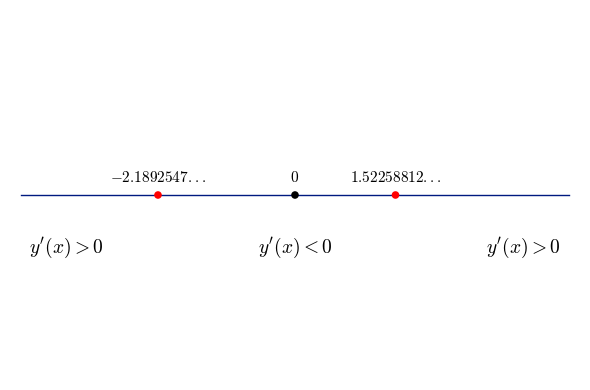

In [22]:
intervals = plot(0, xmin = -3, xmax = 3, ymin = -1, ymax = 1, rgbcolor=(0, 0.1, 0.5))

intervals += point((-1.5, 0), color="red", size=30, zorder=10)
intervals += point((1.1, 0), color="red", size=30, zorder=10) 
intervals += point((0, 0), color="black", size=30, zorder=10)

intervals  += text("$0$", (0, 0.1), color="black", fontsize=11)
intervals  += text("$-2.1892547...$", (-1.5, 0.1), color="black", fontsize=11)
intervals  += text("$1.52258812...$", (1.1, 0.1), color="black", fontsize=11)

intervals  += text("$y'(x) > 0$", (-2.5, -0.3), color="black", fontsize=14)
intervals  += text("$y'(x) > 0$", (2.5, -0.3), color="black", fontsize=14)
intervals  += text("$y'(x) < 0$", (0, -0.3), color="black", fontsize=14)

intervals.show(axes=False)

6. Точки экстремума и значения в этих точках

Экстремумов исходная функция не имеет. Однако имеет есть локальные максимум и минимум в точках -$\frac{1}{3}$$\sqrt{31}$ - $\frac{1}{3}$ и $\frac{1}{3}$$\sqrt{31}$ - $\frac{1}{3}$ соответственно

In [30]:
y(1.4)

0.242752078113806

In [24]:
y(-1/3+sqrt(31)/3 + 0.5)

3/4*sqrt(abs(1/9*(sqrt(31) - 1)^3 + 2/9*(sqrt(31) - 1)^2 - 10/3*sqrt(31) + 10/3))/(sqrt(31) - 1)

In [25]:
y(1.6)

0.185404962177392

In [26]:
y(-2.3)

-0.185771013791757

In [27]:
y(-1/3-sqrt(31)/3)

-3/4*sqrt(abs(-1/9*(sqrt(31) + 1)^3 + 2/9*(sqrt(31) + 1)^2 + 10/3*sqrt(31) + 10/3))/(sqrt(31) + 1)

In [28]:
y(-2.1)

-0.169908939196993

7. Непрерывность. Наличие точек разрыва и их классификация

Функция непрерывна на D, а в точке x = 0 разрыв второго рода

In [31]:
limit(sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x), x=+0)

Infinity

In [32]:
limit(sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x), x=-0)

Infinity

8. Асимптоты

Уравнения наклонных асимптот обычно ищут в виде $y = kx + b$.

По определению асимптоты: $\lim_{x\to\infty} (kx + b - y(x)) = 0$

Находим коэффициент k:

$k = \lim_{x\to\infty} (y(x) / x)$

In [33]:
limit(sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / ((4*x)*x), x=infinity)

0

и коэффициент b:

$b = \lim_{x\to\infty} (y(x) - kx)$

In [34]:
limit(sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x), x=infinity)

+Infinity

Получаем, что горизонтальной асимптоты не существует. Вертикальная равна x = 0